In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
 rand= np.array([[0.9796, np.nan,  np.nan, np.nan, np.nan],
...        [0.9647, 0.9515,    np.nan, np.nan, np.nan],
...        [0.9598, 0.9373, 0.9551,     np.nan, np.nan],
...        [0.9442, 0.9229, 0.9461, 0.9542,    np.nan],
...        [0.94  , 0.9138, 0.9458, 0.9391, 0.9552]])


In [5]:
kmeans = np.array([[0.9753,  np.nan,  np.nan, np.nan, np.nan],
...        [0.9568, 0.9546,  np.nan,  np.nan, np.nan],
...        [0.9459, 0.9268, 0.9504,    np.nan, np.nan],
...        [0.9283, 0.9169, 0.9389, 0.9463,    np.nan],
...        [0.9049, 0.8945, 0.9286, 0.9264, 0.951 ]])




In [12]:
def plot3(filename,  rand_vcl, kcen_vcl):

    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()
    plt.plot(np.arange(len(rand_vcl))+1, rand_vcl, label='VCL + Random Coreset', marker='o')
    plt.plot(np.arange(len(kcen_vcl))+1, kcen_vcl, label='VCL + K-center Coreset', marker='o')
    ax.set_xticks(range(1, len(rand_vcl)+1))
    ax.set_ylabel('Average accuracy')
    ax.set_xlabel('\# tasks')
    ax.legend()
    plt.show()
    #fig.savefig(filename)
    #plt.close()


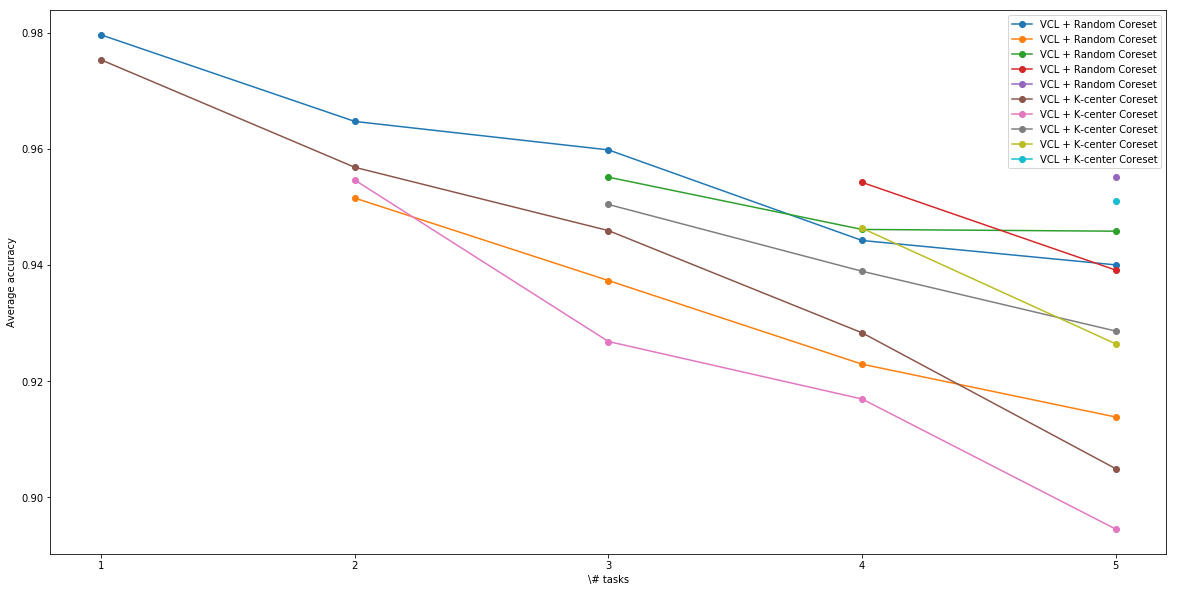

In [13]:
plot3("results.jpg", rand, kmeans)

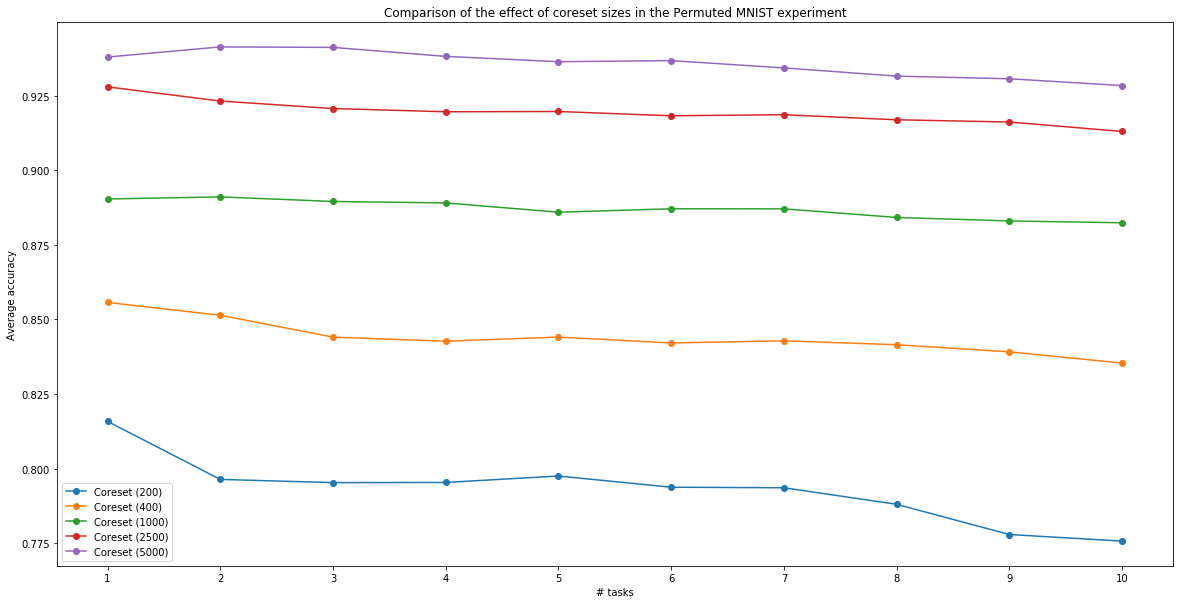

In [4]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "only-coreset-*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))

for coreset_size in coreset_sizes:
    
    file_name = "only-coreset-{}.npy".format(coreset_size)
    label = 'Coreset ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]   
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, marker='o')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


['discriminative/results\\rand-VCL-1000.npy', 'discriminative/results\\rand-VCL-200.npy', 'discriminative/results\\rand-VCL-2500.npy', 'discriminative/results\\rand-VCL-400.npy', 'discriminative/results\\rand-VCL-5000.npy']


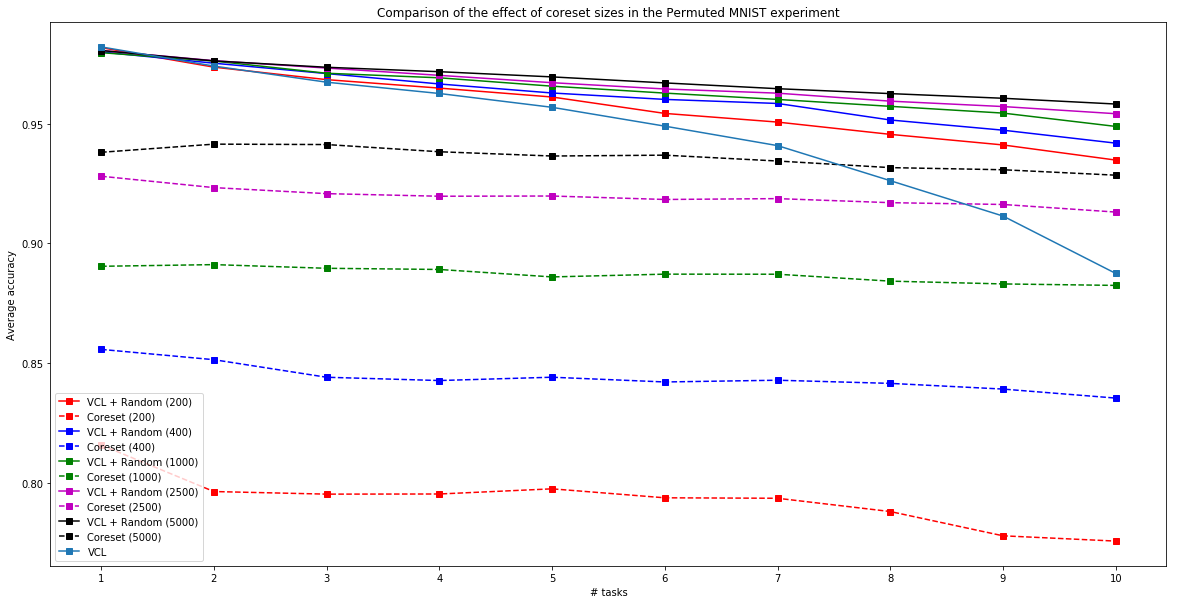

In [30]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "rand-VCL*.npy"))
print(directory_files)
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))
color_coresets = ["r","b","g", "m", "black"]
for i, coreset_size in enumerate(coreset_sizes):
    
    file_name = "rand-VCL-{}.npy".format(coreset_size)
    label = 'VCL + Random ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, color ="{}".format(color_coresets[i]) ,marker='s')
    
    file_coreset_name = "only-coreset-{}.npy".format(coreset_size)
    label_coreset = 'Coreset ({})'.format(coreset_size)
    acc_coreset_file = np.load(directory + file_coreset_name)
    acc_mean_coreset_file = np.nanmean(acc_coreset_file, 1)
    plt.plot(np.arange(len(acc_mean_coreset_file))+1, acc_mean_coreset_file, label=label_coreset, linestyle = "--", color= "{}".format(color_coresets[i]), marker='s')

    
file_name = "VCL.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL", marker='s')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


In [35]:
print(np.load("discriminative/results/VCL.npy"))

[[0.982     nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [0.9759 0.9721    nan    nan    nan    nan    nan    nan    nan    nan]
 [0.9689 0.9607 0.9722    nan    nan    nan    nan    nan    nan    nan]
 [0.9585 0.9566 0.9659 0.9692    nan    nan    nan    nan    nan    nan]
 [0.9609 0.9363 0.9603 0.9613 0.9651    nan    nan    nan    nan    nan]
 [0.9334 0.9341 0.9441 0.9548 0.9589 0.9682    nan    nan    nan    nan]
 [0.9262 0.9161 0.9249 0.9459 0.9513 0.9602 0.9609    nan    nan    nan]
 [0.9098 0.8679 0.9085 0.92   0.9349 0.9553 0.9508 0.962     nan    nan]
 [0.9124 0.8377 0.855  0.8962 0.9247 0.9309 0.9404 0.9485 0.9566    nan]
 [0.8988 0.7653 0.8199 0.8501 0.8894 0.9086 0.9139 0.9294 0.9422 0.9566]]


In [41]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "*-split.npy"))
VCL_split = np.load(directory+"VCL-split.npy")
randVCL_split = np.load(directory+"randVCL-split.npy")
kcenVCL_split = np.load(directory+"kcenVCL-split.npy")
print(VCL_split)
print(randVCL_split)
print(kcenVCL_split)

[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97992165        nan        nan        nan]
 [0.99952719 0.97992165 0.99146211        nan        nan]
 [0.99763593 0.96816846 0.99199573 0.99496475        nan]
 [0.97446809 0.91283056 0.98665955 0.98237664 0.98033283]]
[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97992165        nan        nan        nan]
 [0.99952719 0.97992165 0.99146211        nan        nan]
 [0.99763593 0.96816846 0.99199573 0.99496475        nan]
 [0.97446809 0.91283056 0.98665955 0.98237664 0.98033283]]
[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97992165        nan        nan        nan]
 [0.99952719 0.97992165 0.99146211        nan        nan]
 [0.99763593 0.96816846 0.99199573 0.99496475        nan]
 [0.97446809 0.91283056 0.98665955 0.98237664 0.98033283]]


<Figure size 432x288 with 0 Axes>

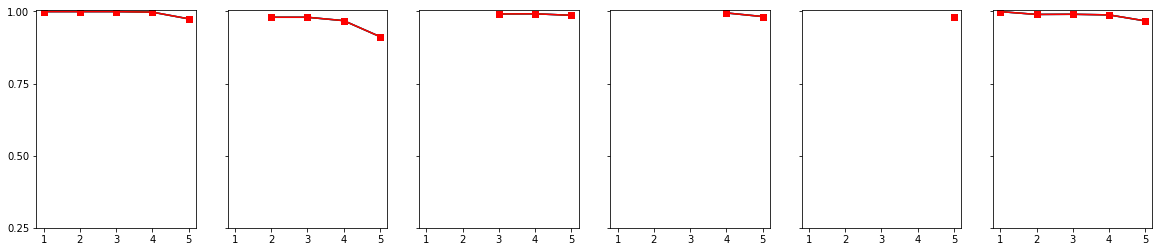

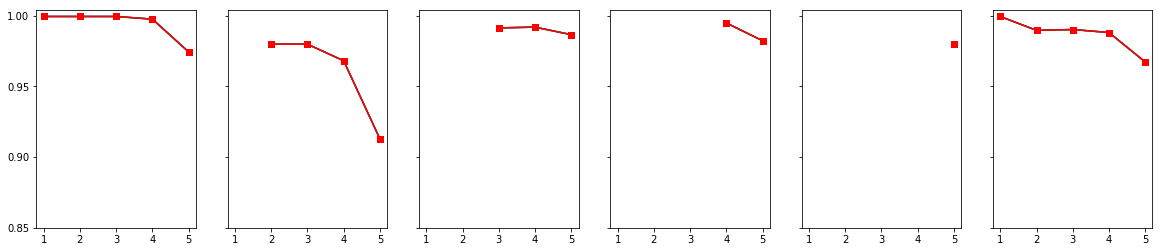

In [120]:
x = np.arange(1,6)

plt.clf()
g, ax1 = plt.subplots(1, 6, figsize=(20,4), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 6, figsize=(20,4), sharex=True,
                                                        sharey=True)
for i in range(5):
    ax1[i].plot(x[i:], VCL_split[i:,i], color = "b", marker = "s")
    ax1[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax1[i].plot(x[i:], kcenVCL_split[i:,i], color = "r", marker = "s")
    ax2[i].plot(x[i:], VCL_split[i:,i],color = "b", marker = "s")
    ax2[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax2[i].plot(x[i:], kcenVCL_split[i:,i], color = "r",marker = "s")
ax1[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "r", marker = "s")
ax2[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "r", marker = "s")
    
for i in range(6):
    ax1[i].set_yticks(np.arange(0.25, 1.25, 0.25))
    ax2[i].set_yticks(np.arange(0.85, 1.00, 0.05))

#for axi in ax1.flat:
#    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
#    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

